In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


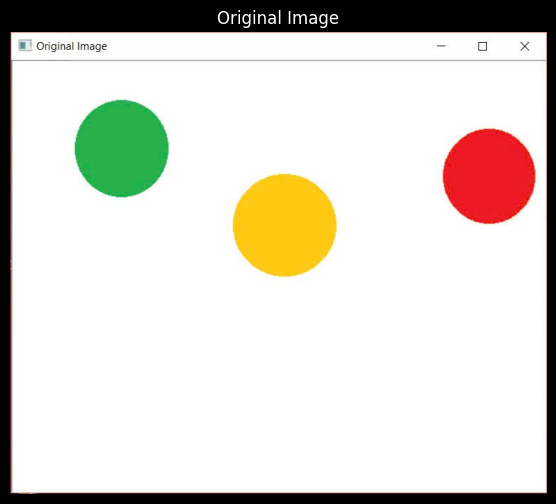

In [3]:
# 1. Tải và hiển thị hình ảnh gốc
image_path = r'pic.jpg'
img = cv2.imread(image_path)

if img is None:
    print("Không thể tải ảnh. Vui lòng kiểm tra đường dẫn.")
else:
    # Hiển thị ảnh gốc để kiểm tra
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.show()


In [4]:
# 2. Chuyển đổi không gian màu và định nghĩa dải màu
if img is not None:
    # Chuyển đổi sang không gian màu HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Định nghĩa dải màu cho các bong bóng
    colors = {
        "Green": ([40, 40, 40], [80, 255, 255]),
        "Yellow": ([20, 100, 100], [30, 255, 255]),
        "Red": ([0, 100, 100], [10, 255, 255])
    }
    
    # Dải màu đỏ thứ 2 (do màu đỏ nằm ở hai đầu dải HSV)
    lower_red2 = np.array([170, 100, 100])
    upper_red2 = np.array([180, 255, 255])
    
    print("Đã định nghĩa các dải màu.")


Đã định nghĩa các dải màu.


In [5]:
# 3. Thực hiện phát hiện màu sắc và tìm tọa độ
if img is not None:
    output = img.copy()
    results = []

    for color_name, (lower, upper) in colors.items():
        lower_bound = np.array(lower, dtype="uint8")
        upper_bound = np.array(upper, dtype="uint8")

        # Tạo mask
        mask = cv2.inRange(hsv, lower_bound, upper_bound)
        
        # Kết hợp dải màu đỏ nếu cần
        if color_name == "Red":
            mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
            mask = cv2.bitwise_or(mask, mask2)

        # Tìm contours (đường bao)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            # Lọc bỏ các vùng quá nhỏ (nhiễu)
            area = cv2.contourArea(cnt)
            if area > 500:
                # Tính toán tâm của vật thể (Moments)
                M = cv2.moments(cnt)
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                    
                    results.append((color_name, cX, cY))
                    print(f"Phát hiện bong bóng {color_name} tại tọa độ: ({cX}, {cY})")

                    # Vẽ dấu và văn bản lên ảnh kết quả
                    cv2.circle(output, (cX, cY), 7, (255, 255, 255), -1)
                    cv2.putText(output, f"{color_name} ({cX}, {cY})", (cX - 50, cY - 50), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
                    cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)


Phát hiện bong bóng Green tại tọa độ: (155, 162)
Phát hiện bong bóng Yellow tại tọa độ: (384, 270)
Phát hiện bong bóng Red tại tọa độ: (670, 201)


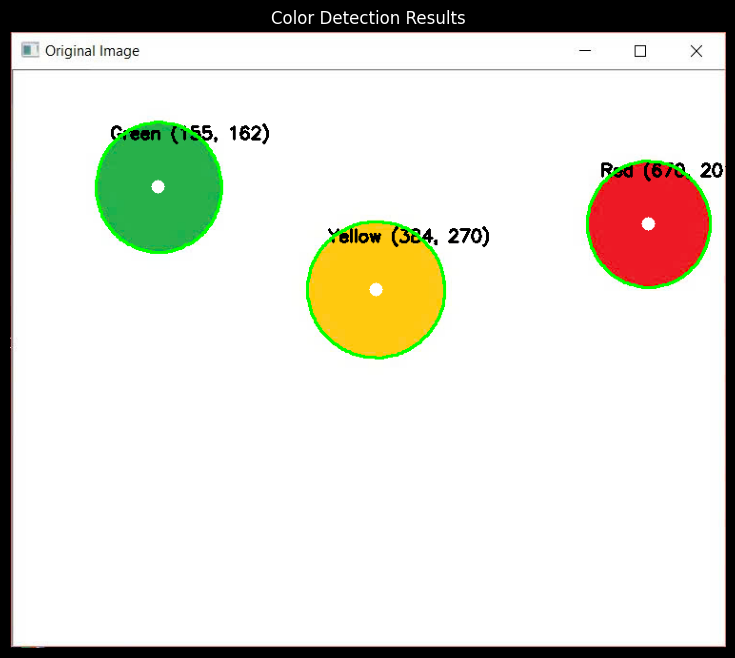

In [6]:
# 4. Hiển thị kết quả cuối cùng
if img is not None:
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Color Detection Results")
    plt.axis("off")
    plt.show()
